## Plataformas

### As dez plataformas que mais lançaram jogos (1992 - 2024)

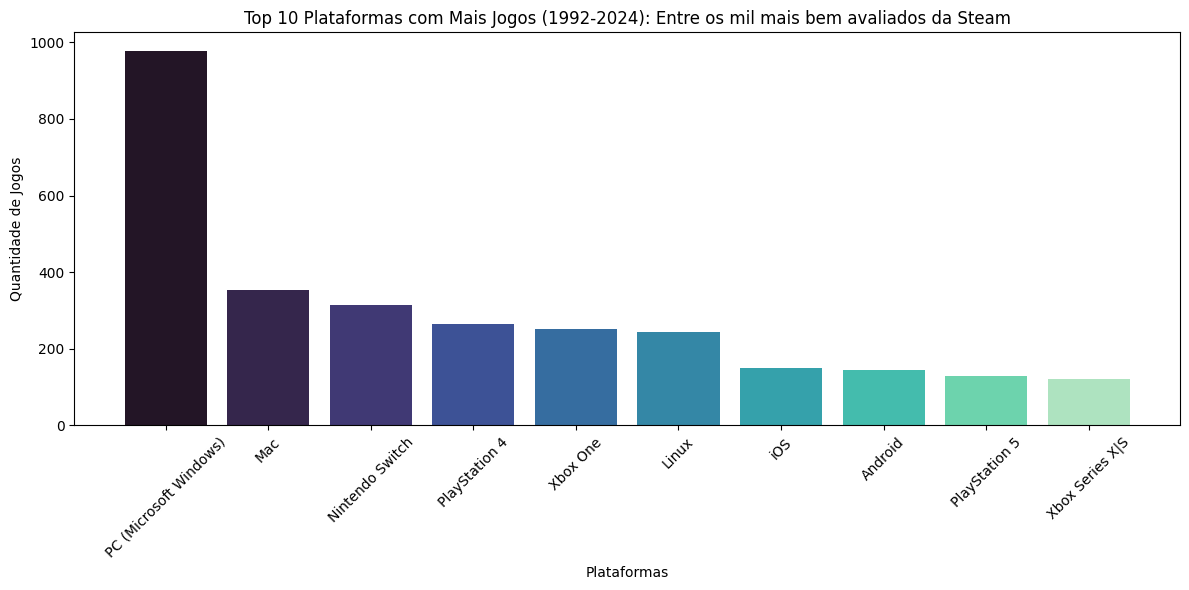

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar os dados do CSV
df = pd.read_csv('games_data.csv')

# Converter o timestamp Unix para datetime e extrair o ano
df['release_year'] = pd.to_datetime(df['first_release_date'], unit='s').dt.year

# Lidar com as listas para transforma-las em string
df['platforms'] = df['platforms'].apply(lambda x: eval(x) if isinstance(x, str) else x)
df_exploded = df.explode('platforms')
df_exploded['platforms'] = df_exploded['platforms'].astype(str)

# Contar jogos por plataforma
frequencia = df_exploded.groupby('platforms').size().reset_index(name='count')

# 10 plataformas mais frequentes
top_platforms = frequencia.nlargest(10, 'count')

# plotando o grafico
plt.figure(figsize=(12, 6)) # deixar menos quadrado
colors = sns.color_palette("mako", len(top_platforms))  # paleta de cores mako 
plt.bar(top_platforms['platforms'], top_platforms['count'], color=colors)
plt.title('Top 10 Plataformas com Mais Jogos (1992-2024): Entre os mil mais bem avaliados da Steam')
plt.xlabel('Plataformas')
plt.ylabel('Quantidade de Jogos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


* O limite de dez plataformas que tiverem o indice de presença mais alto se deve a uma visualização melhor. 
* O gráfico indica que os jogos de PC foram dominantes durante todo o período, o que faz sentido, haja vista que os jogos do dataset recolhido são jogos para Steam que é uma distribuidora de jogos para computador. Portanto, em geral, os jogos serão disponíveis para computador, o que enviesa o gráfico. 
* É importante lembrar que os jogos mobile são apenas jogos que são lançados para mobile e também PC, em dados brutos a produção de jogos mobile é exponencialmente maior que a produção de jogos lançados para computador. 
* Além disso todos os gráficos cortam o viés de serem o top 1000 jogos mais bem avaliados da Steam.

### As dez plataformas que mais lançaram jogos por ano (grafico de linhas)

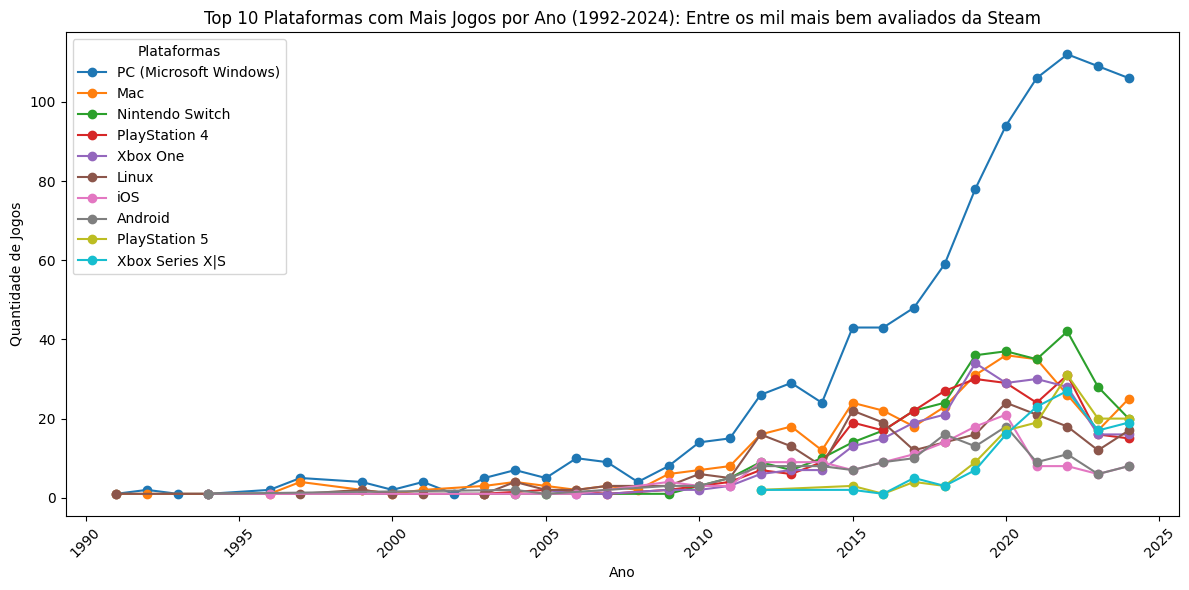

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('games_data.csv')

# Ano
df['release_year'] = pd.to_datetime(df['first_release_date'], unit='s').dt.year

# trabalhar com listas de plataforma
df['platforms'] = df['platforms'].apply(lambda x: eval(x) if isinstance(x, str) else x)
df_exploded = df.explode('platforms')
df_exploded['platforms'] = df_exploded['platforms'].astype(str)

# Contar a quantidade de jogos por ano e plataforma
frequencia = df_exploded.groupby(['release_year', 'platforms']).size().reset_index(name='count')

# Filtrar as 10 plataformas mais frequentes em todos os anos (deixar visivelmente melhor)
top_platforms = frequencia.groupby('platforms')['count'].sum().nlargest(10).index
frequencia_top = frequencia[frequencia['platforms'].isin(top_platforms)]

# plotar grafico
plt.figure(figsize=(12, 6))
for platform in top_platforms:
    plt_data = frequencia_top[frequencia_top['platforms'] == platform]
    plt.plot(plt_data['release_year'], plt_data['count'], marker='o', label=platform)

plt.title('Top 10 Plataformas com Mais Jogos por Ano (1992-2024): Entre os mil mais bem avaliados da Steam')
plt.xlabel('Ano')
plt.ylabel('Quantidade de Jogos')
plt.xticks(rotation=45)
plt.legend(title='Plataformas')
plt.tight_layout()
plt.show()


* O limite de dez plataformas que tiverem o indice de presença mais alto se deve a uma visualização melhor. 
* Entre as outras plataformas fora PC, Mac desponta em segundo lugar nos anos ao longo dos anos, mas sendo superado pelo Nintendo Switch nos anos recentes. 
* Já Playstation e Xbox compatilham lugares próximos, sendo os da nova geração menos presentes. O que faz sentido em vista a recepção dos consoles da nona geração (PS5, Xbox Series S|X) em frente os da oitava geração; os jogos se tornam cada vez mais caros no desenvolvimento.
* Lembrando que o gráfico avalia a quantidade de jogos lançados e não vendas, portanto faz sentido pois é relativamente mais simples lançar um jogo para computador do que para console. E jogos do Nintendo Switch, pode-se argumentar que são menos trabalhosos até pela capacidade técnica do console. 
* Outro ponto interessante é a presença de iOS e Android entre os jogos que são lançados para o computador, os quais apresentavam um crescimento constante de 2010 até 2020 - lembrando que antes de 2010 não era tão comum esses jogos serem lançados para PC e mobile (iOS lançou em 2006 e Android em 2008) - estas não representam um crescimento constante após 2020. Enquanto outras plataformas despontaram em 2020, por conta da pandemia do Covid-19, mas apresentando queda logo após o período quando a legislação começou a relaxar e as pessoas voltaram a sair de casa.
* O Nintendo Switch está em fim de ciclo (lançado em 2017) já com 7 anos, e o novo console da nintendo foi anunciado (Nintendo Switch 2) em que deve fazer sua estreia em 2025, portanto concentrando o desenvolvimento de novos jogos para o novo dispositivo. O que justifica a queda na produção após o ano de 2022. Em 2022 o console já tinha 5 anos de existência em um mercado que o tempo médio da geração era de 6 anos - O Switch superou essa marca resistindo sete anos (2024) e só será lançado no oitavo ano de existência do antigo console.

## Grafico de Correlação
### Total de reviews por porcentagem


In [52]:
import seaborn as sns
import pandas as pd


# Leitura do CSV
df = pd.read_csv('games_data.csv')

# Remover vírgulas dos números e o símbolo de porcentagem, convertendo para float
df['rating percentage'] = df['rating percentage'].str.replace('%', '').str.replace(',', '').astype(float)

# Converter 'total reviews' para string, remover vírgulas, e converter para float
df['total reviews'] = df['total reviews'].astype(str).str.replace(',', '').astype(float)

# Calcular a correlação entre 'total reviews' e 'rating percentage'
correlacao = df['total reviews'].corr(df['rating percentage'])

print(correlacao)




0.007220126054406023


O valor da correlação 0.00720.0072 indica uma correlação muito fraca, quase inexistente, entre as colunas 'total reviews' e 'rating percentage'. Isso significa que, com base nos dados, não há uma relação linear significativa entre o número total de reviews e a porcentagem de avaliação.

Correlação: 0.007220126054406023


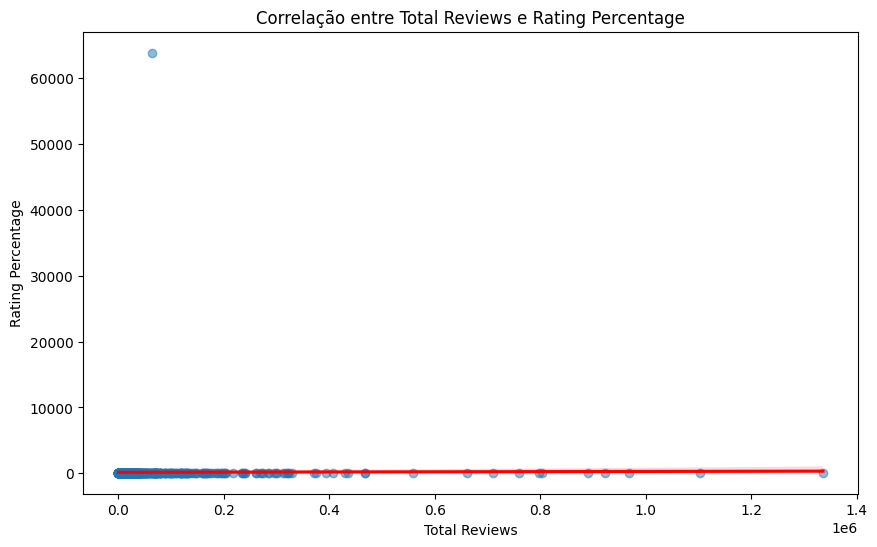

In [5]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Leitura do CSV
df = pd.read_csv('games_data.csv')

# Remover vírgulas dos números e o símbolo de porcentagem, convertendo para float
df['rating percentage'] = df['rating percentage'].str.replace('%', '').str.replace(',', '').astype(float)

# Converter 'total reviews' para string, remover vírgulas, e converter para float
df['total reviews'] = df['total reviews'].astype(str).str.replace(',', '').astype(float)

# Calcular a correlação entre 'total reviews' e 'rating percentage'
correlacao = df['total reviews'].corr(df['rating percentage'])
print(f'Correlação: {correlacao}')

# Criar gráfico de dispersão com linha de regressão
plt.figure(figsize=(10, 6))
sns.regplot(x='total reviews', y='rating percentage', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Correlação entre Total Reviews e Rating Percentage')
plt.xlabel('Total Reviews')
plt.ylabel('Rating Percentage')
plt.show()


Gráfico que demonstra a inexistência da correlação entre o número total de reviews e a porcentagem do quociente entre reviews positivas e negativas. Nesse sentido, é possível refletir que um jogo mais popular - com um número maior de avaliações - não presume uma avaliação melhor esses itens não estão correlacionados. Com a presença de um outlier que distorce o gráfico

#### Adereçando o outlier (para melhorar o gráfico)

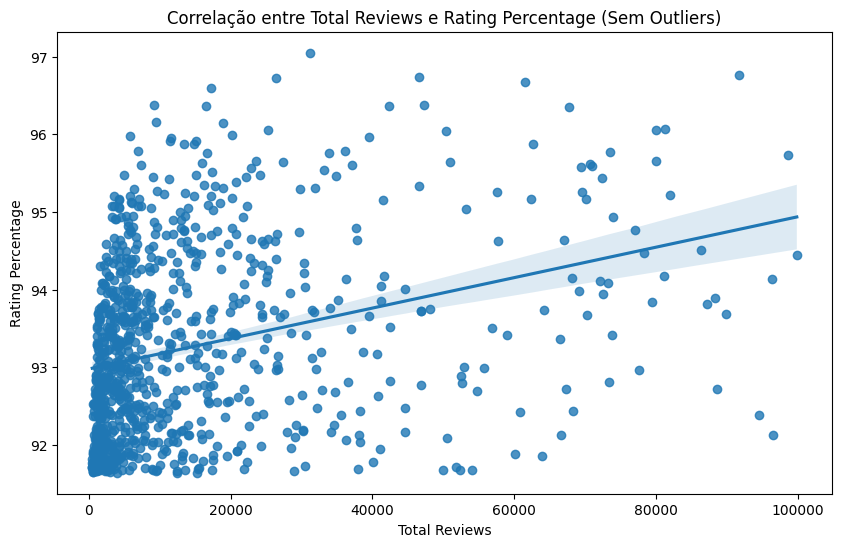

In [7]:
# Remover outliers com base em limites para 'total reviews' ou 'rating percentage'
df_filtered = df[(df['total reviews'] < 100000) & (df['rating percentage'] < 100)]

plt.figure(figsize=(10, 6))
sns.regplot(x='total reviews', y='rating percentage', data=df_filtered)
plt.title('Correlação entre Total Reviews e Rating Percentage (Sem Outliers)')
plt.xlabel('Total Reviews')
plt.ylabel('Rating Percentage')
plt.show()


O gráfico apresenta pontos quase que aleatórios e uma grande concentração em jogos com pequeno número de avaliações.

## Gêneros de Jogos

### Gêneros de Jogos com Maior Sucesso entre o Público

                          genres  public_rating_igdb
15                     Roguelike            8.700000
25                  Visual Nove;            8.500000
24     Turn-based strategy (TBS)            8.403448
8                        Pinball            8.400000
27  hack and slash or beat em up            8.017241
16            Role-playing (RPG)            8.005422
12                    QuizTrivia            7.980000
14      Real Time Strategy (RTS)            7.976923
9                       Platform            7.923596
17                       Shooter            7.907080
21                      Strategy            7.893798
22                      Tactical            7.878947
1                      Adventure            7.865835
3              Card & Board Game            7.830000
11                        Puzzle            7.766486
7                          Music            7.723810
0                         Action            7.710000
19                     Simulator            7.

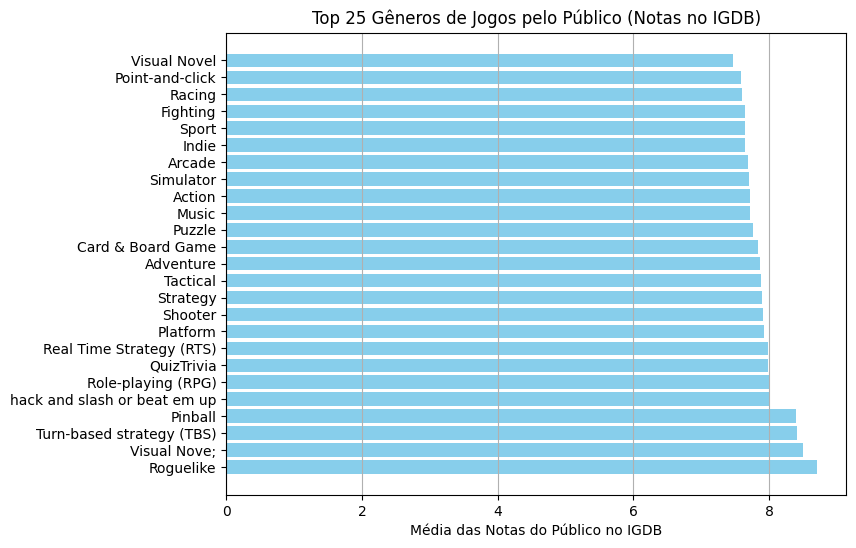

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('games_data.csv')

df['rating percentage'] = df['rating percentage'].str.replace('%', '').str.replace(',', '').astype(float) / 100

df['public_rating_igdb'] = pd.to_numeric(df['public_rating_igdb'].str.replace(',', ''), errors='coerce')

df_exploded = df.explode('genres')

df_exploded['genres'] = df_exploded['genres'].str.strip('[]').str.replace("'", "").str.split(", ")

df_exploded = df_exploded.explode('genres')

average_ratings = df_exploded.groupby('genres')['public_rating_igdb'].mean().reset_index()

average_ratings = average_ratings.sort_values(by='public_rating_igdb', ascending=False)

top_10_genres = average_ratings.head(25)

print(top_10_genres)

plt.figure(figsize=(8, 6))
plt.barh(top_10_genres['genres'], top_10_genres['public_rating_igdb'], color='skyblue')
plt.xlabel('Média das Notas do Público no IGDB')
plt.title('Top 25 Gêneros de Jogos pelo Público (Notas no IGDB)')
plt.grid(axis='x')
plt.show()


O gênero de maior sucesso entre o público foi Roguelike e o de menor sucesso foi Visual Novel.

### Gênero de Jogos com Maior Sucesso entre a Crítica

                          genres  aggregated_rating
15                     Roguelike           9.500000
22     Turn-based strategy (TBS)           8.782609
23                  Visual Nove;           8.700000
3              Card & Board Game           8.650000
21                      Tactical           8.600000
25  hack and slash or beat em up           8.528000
8                        Pinball           8.500000
7                          Music           8.469231
19                         Sport           8.466667
16            Role-playing (RPG)           8.370940
20                      Strategy           8.313580
1                      Adventure           8.266284
11                        Puzzle           8.225455
24                  Visual Novel           8.217391
6                          Indie           8.191139
13                        Racing           8.166667
9                       Platform           8.144286
17                       Shooter           8.142169
18          

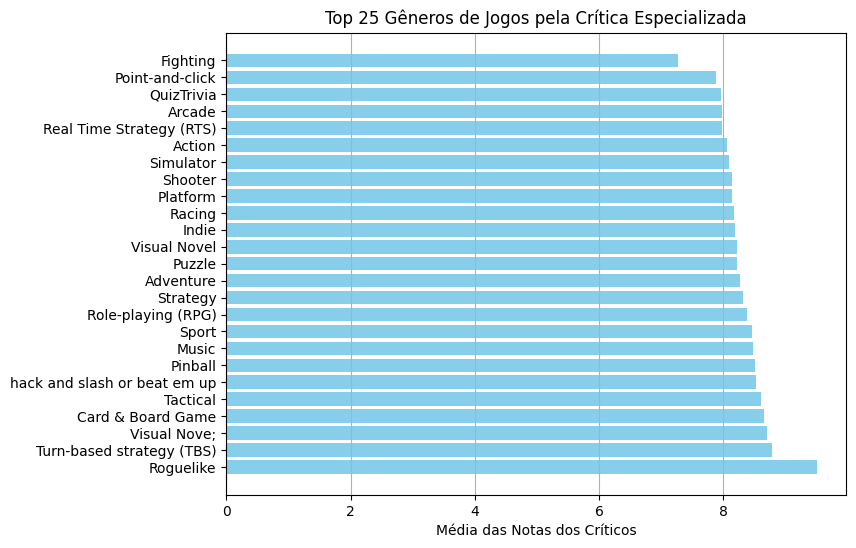

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('games_data.csv')

df['rating percentage'] = df['rating percentage'].str.replace('%', '').str.replace(',', '').astype(float) / 100


df_exploded = df.explode('genres')

df_exploded['genres'] = df_exploded['genres'].str.strip('[]').str.replace("'", "").str.split(", ")

df_exploded = df_exploded.explode('genres')

df_exploded = df_exploded[(df_exploded['aggregated_rating'] >= 0) & (df_exploded['aggregated_rating'] <= 10)]

average_ratings = df_exploded.groupby('genres')['aggregated_rating'].mean().reset_index()

average_ratings = average_ratings.sort_values(by='aggregated_rating', ascending=False)

top_10_genres = average_ratings.head(25)

print(top_10_genres)

plt.figure(figsize=(8, 6))
plt.barh(top_10_genres['genres'], top_10_genres['aggregated_rating'], color='skyblue')
plt.xlabel('Média das Notas dos Críticos')
plt.title('Top 25 Gêneros de Jogos pela Crítica Especializada')
plt.grid(axis='x')
plt.show()


O gênero com maior sucesso entre a crítica foi Roguelike e o de menor sucesso foi o gênero de luta.

### Gêneros de Jogos: Crítica vs. Público
---------------------------- Crítica ------------------------------------------------------ Público -------------------------------
| Rank |        genres                         | public_rating_igdb |        genres                         | aggregated_rating |
|------|---------------------------------------|---------------------|---------------------------------------|-------------------|
|  1   | Roguelike                             | 8.700000            | Roguelike                             | 9.500000          |
|  2   | Visual Nove;                          | 8.500000            | Turn-based strategy (TBS)            | 8.782609          |
|  3   | Turn-based strategy (TBS)            | 8.403448            | Visual Nove;                          | 8.700000          |
|  4   | Pinball                               | 8.400000            | Card & Board Game                     | 8.650000          |
|  5   | hack and slash or beat em up         | 8.017241            | Tactical                              | 8.600000          |
|  6   | Role-playing (RPG)                   | 8.005422            | hack and slash or beat em up         | 8.528000          |
|  7   | QuizTrivia                            | 7.980000            | Pinball                               | 8.500000          |
|  8   | Real Time Strategy (RTS)             | 7.976923            | Music                                 | 8.469231          |
|  9   | Platform                              | 7.923596            | Sport                                 | 8.466667          |
| 10   | Shooter                               | 7.907080            | Role-playing (RPG)                   | 8.370940          |
| 11   | Strategy                              | 7.893798            | Strategy                              | 8.313580          |
| 12   | Tactical                              | 7.878947            | Adventure                             | 8.266284          |
| 13   | Adventure                             | 7.865835            | Puzzle                                | 8.225455          |
| 14   | Card & Board Game                     | 7.830000            | Visual Novel                          | 8.217391          |
| 15   | Puzzle                                | 7.766486            | Indie                                 | 8.191139          |
| 16   | Music                                 | 7.723810            | Racing                                | 8.166667          |
| 17   | Action                                | 7.710000            | Platform                              | 8.144286          |
| 18   | Simulator                             | 7.709884            | Shooter                               | 8.142169          |
| 19   | Arcade                                | 7.693333            | Simulator                             | 8.088889          |
| 20   | Indie                                 | 7.648807            | Action                                | 8.050000          |
| 21   | Sport                                 | 7.646154            | Real Time Strategy (RTS)             | 7.980000          |
| 22   | Fighting                              | 7.637500            | Arcade                                | 7.970732          |
| 23   | Racing                                | 7.605556            | QuizTrivia                            | 7.966667          |
| 24   | Point-and-click                       | 7.584507            | Point-and-click                       | 7.874286          |
| 25   | Visual Novel                          | 7.465278            | Fighting                              | 7.266667          |


* Como podemos ver há algumas interseções entre os gêneros como o Roguelike que está em primeiro lugar em gênero nos dois públicos já outros como Visual Novel é um gênero mais apreciado pela crítica do que pelo público.
* Já os jogos de luta aparecem em colocações mais baixas nos dois rankings
* QuizTrivia é o gênero que mais varia colocações, ocupando a 23 na avaliação do público e uma 7a posição mais positiva pela crítica. Em segundo lugar vem Real Time Strategy, ocupando a 21a posição do pública e 8a posição pela crítica.

#### Tabela da variação de posições dos gêneros de jogos entre público e crítica

| Gênero                         | Posição Crítica | Posição Público | Diferença de Posição |
|--------------------------------|----------------|------------------|----------------------|
| QuizTrivia                     | 7              | 23               | 16                   |
| Real Time Strategy (RTS)      | 8              | 21               | 13                   |
| Visual Novel                   | 3              | 14               | 11                   |
| Shooter                        | 10             | 18               | 8                    |
| Tactical                       | 5              | 12               | 7                    |
| Indie                          | 20             | 15               | 5                    |
| Role-playing (RPG)            | 6              | 10               | 4                    |
| Fighting                       | 22             | 25               | 3                    |
| Pinball                        | 4              | 7                | 3                    |
| Turn-based strategy (TBS)      | 2              | 3                | 1                    |


---

### Sistema de Score entre os jogos e suas avaliações

Melhores Jogos e suas Pontuações Normalizadas:
AVICII Invector: 100.00
Trine: 73.94
ELDEN RING: 71.33
Baldur's Gate 3: 70.81
The Witcher 3: Wild Hunt: 70.27
Disco Elysium: 70.19
Persona 5 Royal: 69.81
Broforce: 69.61
Persona 4 Golden: 69.53
God of War: 69.34


C:\Users\Rod\AppData\Local\Temp\ipykernel_17356\2784227206.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='normalized_score', y='name', data=top_games, palette='Blues_r')


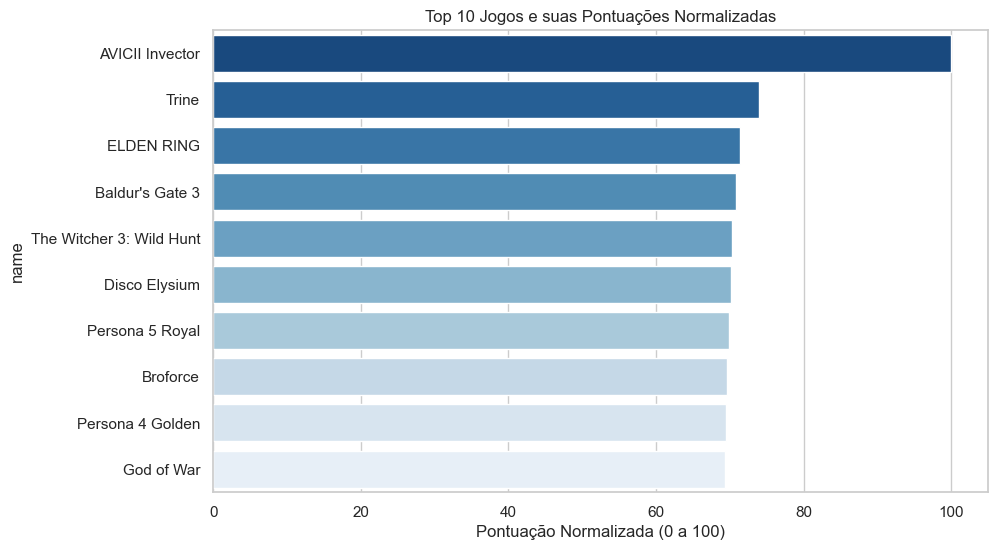

In [100]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Ler o arquivo CSV
df = pd.read_csv('games_data.csv')

# Função para limpar e converter séries
def clean_and_convert(series):
    series = series.astype(str).replace('nan', '')
    series.replace('', np.nan, inplace=True)
    cleaned_series = series.str.replace('.', '', regex=False).str.replace(',', '.', regex=False)
    return cleaned_series.astype(float)

# Limpar os dados
df['positive ratings'] = clean_and_convert(df['positive ratings'])
df['negative ratings'] = clean_and_convert(df['negative ratings'])
df['total reviews'] = clean_and_convert(df['total reviews'])
df['aggregated_rating'] = clean_and_convert(df['aggregated_rating'])
df['aggregated_rating_count'] = clean_and_convert(df['aggregated_rating_count'])
df['public_rating_igdb'] = clean_and_convert(df['public_rating_igdb'])
df['public_rating_count'] = clean_and_convert(df['public_rating_count'])

# Calcular o quociente de avaliações positivas
df['positive_review_ratio'] = df['positive ratings'] / df['total reviews']

# Definição da fórmula do score
df['score'] = (
    (df['aggregated_rating'] * df['aggregated_rating_count']) +
    (df['public_rating_igdb'] * df['public_rating_count']) +
    (df['positive_review_ratio'] * 100)
) / (
    df['aggregated_rating_count'] + 
    df['public_rating_count'] + 
    100
)

# Normalizar a pontuação para ficar entre 0 e 100
min_score = df['score'].min()
max_score = df['score'].max()
df['normalized_score'] = ((df['score'] - min_score) / (max_score - min_score)) * 100

# Remover jogos com pontuação NaN
valid_scores = df[['name', 'normalized_score']].dropna()

# Classificação
top_games = valid_scores.sort_values(by='normalized_score', ascending=False).head(10)

print("Melhores Jogos e suas Pontuações Normalizadas:")
for index, row in top_games.iterrows():
    print(f"{row['name']}: {row['normalized_score']:.2f}")

# Plotar os melhores jogos usando Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='normalized_score', y='name', data=top_games, palette='Blues_r')
plt.xlabel('Pontuação Normalizada (0 a 100)')
plt.title('Top 10 Jogos e suas Pontuações Normalizadas')
plt.show()


O resultado é interessante porque o primeiro colocado é um jogo de ritmo de um artista da música, já em segundo é um jogo de plataforma já um pouco mais antigo (2009). Seguido de títulos mais modernos como Elden Ring, Baldur's Gate 3 e The Witcher. Observando esses títulos é possível observar realmente uma apreciação crítica e do público nesses títulos.

---